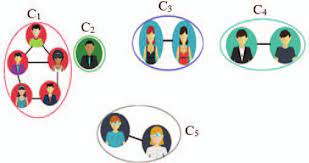

## Visualizing Social Landscapes: A Colorful Dive into Community Detection
I'm thrilled to share my journey into social network analysis using Dash and NetworkX! This code is like a social detective tool, unveiling the hidden communities within a network of users. By adding nodes for users and edges for their interactions (like comments and likes), I've created a complex web of social connections. The real magic happens with the Louvain community detection algorithm, which clusters users into communities based on their interactions. Each community gets a unique color for easy identification. The result? A vibrant, interactive graph that beautifully illustrates the intricate tapestry of social bonds and shared interests. Next, I plan to dive deeper into these communities, exploring key influencers and interaction patterns - it's a journey into the heart of social dynamics!

### Import libraries

In [ ]:
import dash
import dash_cytoscape as cyto
import dash_html_components as html
import networkx as nx
from networkx.algorithms import community

### Building a Social Network Graph with Dash and NetworkX
This code initializes a Dash application and constructs a social network graph using NetworkX, where nodes represent users and edges symbolize user interactions such as comments, likes, and shares. By adding nodes for each user and edges for each interaction, it effectively models the complex web of social interactions in a visualizable format.

In [ ]:
# Create the dash application
app = dash.Dash(__name__)

# Create the network
G = nx.Graph()

# Add nodes (representing users)
users = ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'George', 'Hannah', 'Ian', 'Jane']
G.add_nodes_from(users)

# Add edges (representing interactions: comments, likes, shares)
interactions = [
    ('Alice', 'Bob', {'interaction': 'commented'}),
    ('Alice', 'Charlie', {'interaction': 'liked'}),
    ('Bob', 'Charlie', {'interaction': 'shared'}),
    ('Bob', 'David', {'interaction': 'liked'}),
    ('Charlie', 'David', {'interaction': 'commented'}),
    ('David', 'Eve', {'interaction': 'liked'}),
    ('Eve', 'Frank', {'interaction': 'shared'}),
    ('Alice', 'Frank', {'interaction': 'commented'}),
    ('George', 'Hannah', {'interaction': 'liked'}),
    ('George', 'Ian', {'interaction': 'commented'}),
    ('Hannah', 'Ian', {'interaction': 'shared'}),
    ('Hannah', 'Jane', {'interaction': 'liked'}),
    ('Ian', 'Jane', {'interaction': 'commented'}),
]
G.add_edges_from(interactions)

### Illuminating Social Networks: Community Detection and Visualization with Dash
This code transforms a NetworkX graph into a Dash Cytoscape data format, creating an interactive visualization of social network communities. After applying the Louvain community detection algorithm to group nodes into communities, each node and edge is added to an elements list with specific details. Nodes are then color-coded based on their community, resulting in a colorful and insightful representation of the social network in a Dash application.

In [2]:
# Convert Networkx graph data to Dash Cytoscape data
def from_networkx(G):
    # Create elements list
    elements = []

    # Add nodes to elements list
    for node in G.nodes:
        elements.append(
            {
                'data': {'id': node, 'label': node, 'community': G.nodes[node]['community']}
            }
        )

    # Add edges to elements list
    for edge in G.edges:
        elements.append(
            {
                'data': {'source': edge[0], 'target': edge[1], 'label': G.edges[edge]['interaction']}
            }
        )

    return elements

# Apply the Louvain community detection algorithm
communities = community.greedy_modularity_communities(G)

# Assign each node to a community (for coloring)
for i, comm in enumerate(communities):
    for name in comm:
        G.nodes[name]['community'] = i

# Convert Networkx graph data to Dash Cytoscape data
elements = from_networkx(G)

# Add color to nodes
for element in elements:
    if 'community' in element['data']:
        community_id = element['data']['community']
        colors = ['red', 'green', 'blue', 'yellow']  # add more colors for more communities
        element['style'] = {'background-color': colors[community_id % len(colors)]}

# Create Dash Cytoscape component
cytoscape_component = cyto.Cytoscape(
    id='cytoscape',
    elements=elements,
    layout={'name': 'circle'},
    style={'width': '100%', 'height': '800px'},
    stylesheet=[
        {
            'selector': 'node',
            'style': {
                'background-color': 'data(color)',
                'label': 'data(id)'
            }
        },
        {
            'selector': 'edge',
            'style': {
                'label': 'data(label)'
            }
        }
    ]
)

# Add the Cytoscape component to the Dash app layout
app.layout = html.Div([cytoscape_component])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)
